Text(0.5, 1.0, ' Phase Response')

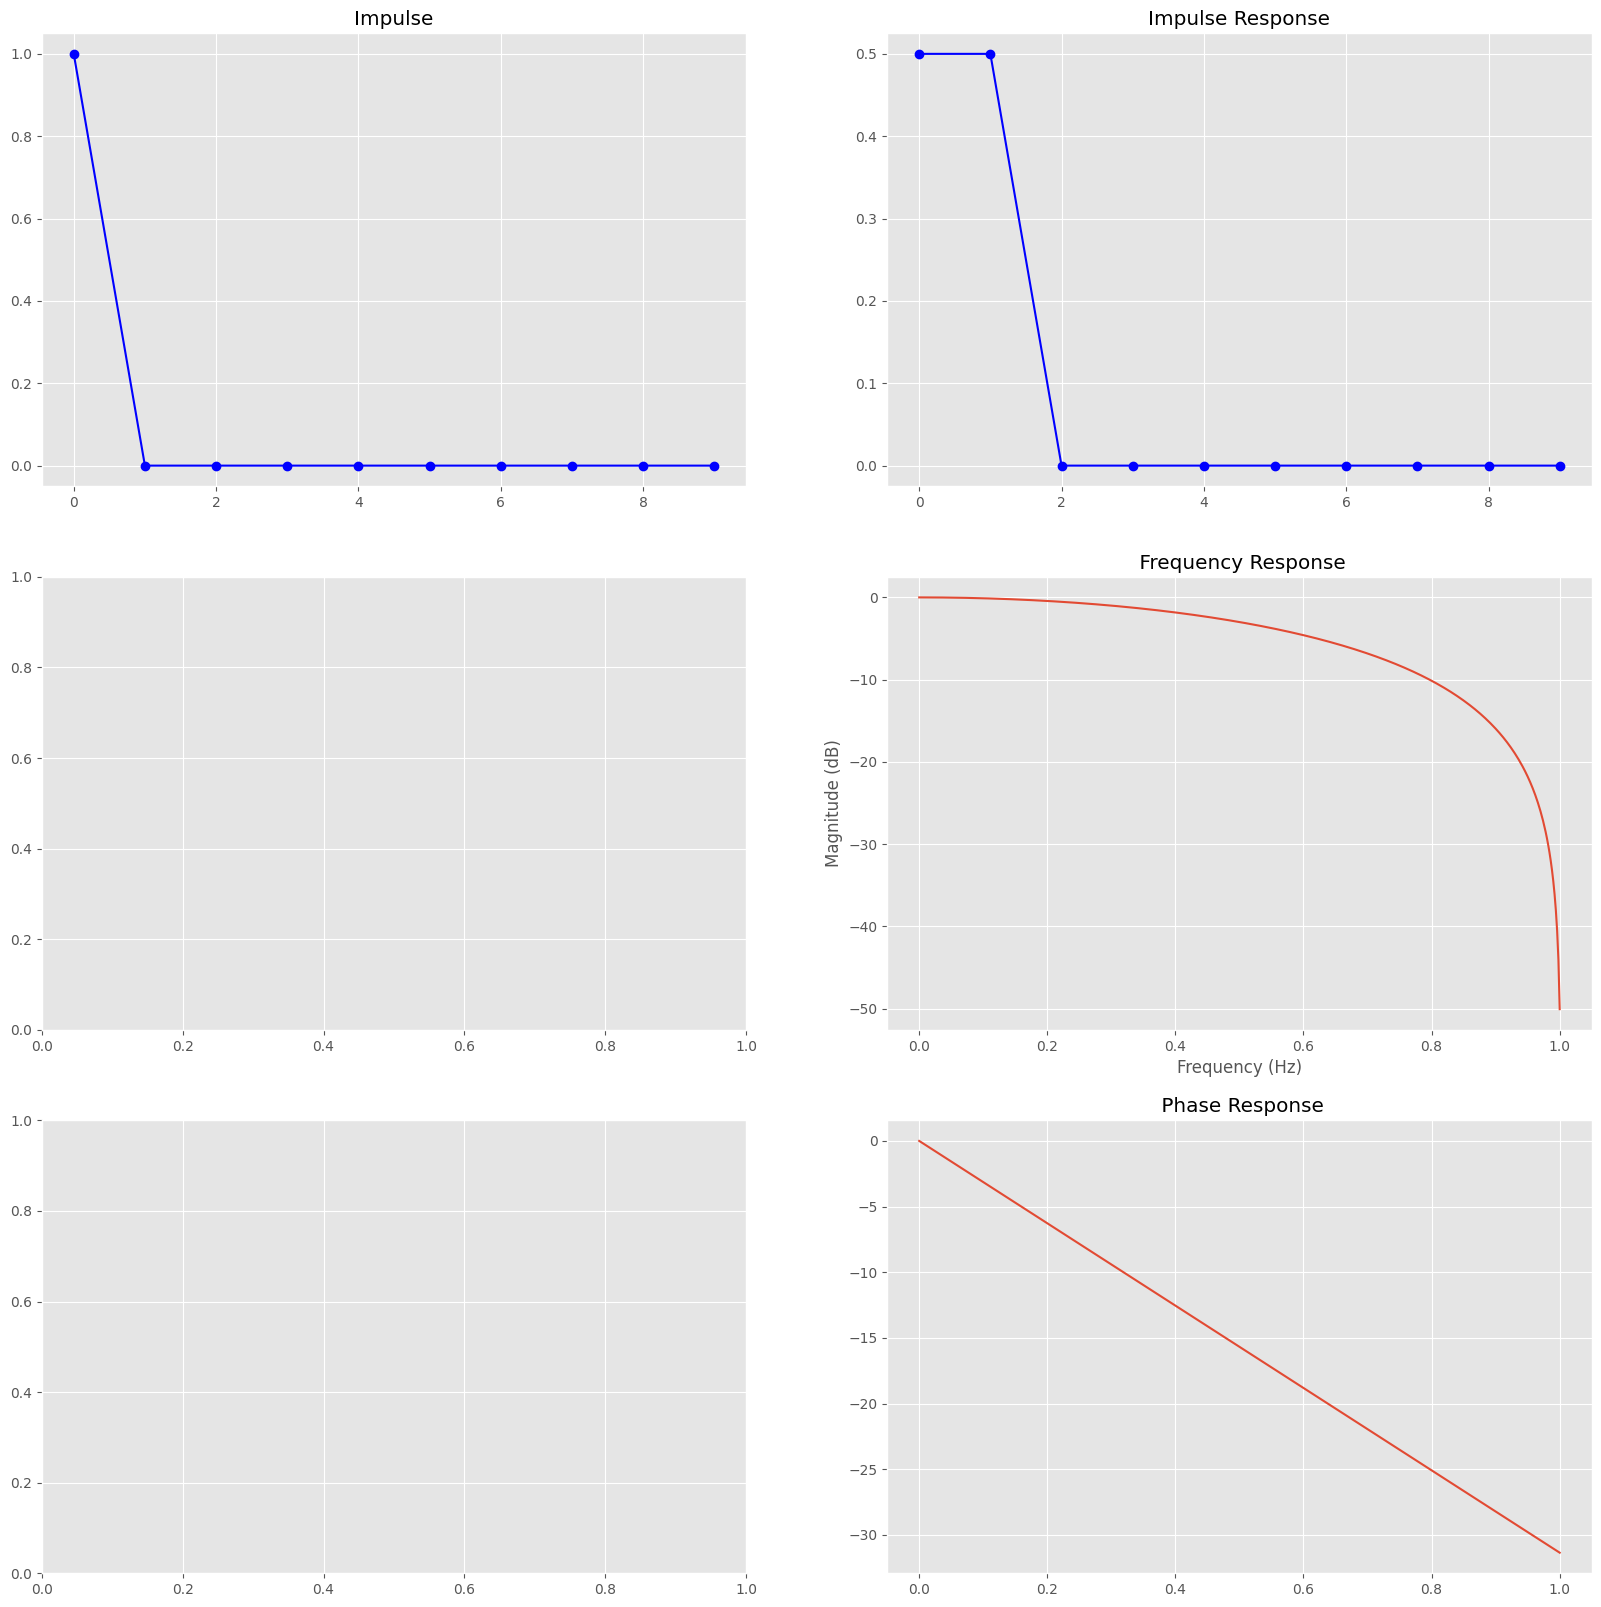

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from matplotlib import style 

plt.style.use('ggplot')

samples=1000

impulse = np.zeros(samples)
impulse[0] = 1

def feedForward(x, a0, a1):
    b = np.zeros(samples)
    for i in range(0, x.size):
        b[i] = a0 * x[i] + a1 * x[i-1]
    return b

response = feedForward(impulse,0.5, 0.5);

x=np.linspace(0, 1, response.size//2)
with np.errstate(divide='ignore', invalid='ignore'):
    response_fft = fft.fft(response)
    y=(20 * np.log10(np.abs(response_fft)))[:response_fft.size//2]
    phase=(20 * np.angle(response_fft))[:response_fft.size//2]
    

fig, ax = plt.subplots(3,2, figsize=(20, 20))

ax[0][0].plot(impulse[:10],'bo-')
ax[0][0].set_title('Impulse')
ax[0][1].plot(response[:10],'bo-')
ax[0][1].set_title('Impulse Response')

ax[1][1].plot(x, y, label='b')
ax[1][1].set_xlabel('Frequency (Hz)')
ax[1][1].set_ylabel('Magnitude (dB)')
ax[1][1].set_title(' Frequency Response')

ax[2][1].plot(x, phase, label='b')
ax[2][1].set_title(' Phase Response')




